# Mandatory assignment 1: Data analysis project - ATP Tennis scores

This project consists of three main sections which are trying to describe, analyse and derive useful conclusions in the realm of ATP results from 2000-2010. Section one will first of all combine all 10 individual csv-files into on merged file and hereafter apply the nessesary cleaning and structuring, which mean column deletion and elimination of rows which are containing empty data. In section two we apply descriptive statistics and find useful  

* **Step 1: Package import:** The first part of coding in our project is the import of useful packages and 

In [53]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

...................................................................................................................................................................................................................................

* **Step 2: Setting of local environment:** This part is locating our main environment folder at the desktop called atp-matches-dataset.

In [54]:
#sti til mappe der skal arbejdes i 
os.chdir("/Users/Christofferku/Desktop/atp-matches-dataset/")


...................................................................................................................................................................................................................................

* **Step 3: Deletion of old runs:** We will later save the merged csv in out local folder and we do therefore delete earlier version of this copy. Moreover the only files which have to be merged in step 4 is the annual data and cannot be contaminated by other csv files.

In [55]:
#hvis filen vi danner i forvejen findes slettes den så der kan køres en ny
if os.path.exists("Tennis_mod.csv"):
    os.remove("Tennis_mod.csv")
else:
    print('File does not exists')

...................................................................................................................................................................................................................................

* **Step 4: Merging all files :** all files with the extension 'csv' is chosen and merged into one joint table file in tennis_total by the function panda.concat

In [56]:
#alle filer med format csv medtages og samles i tennis_total
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
Tennis_total = pd.concat([pd.read_csv(f) for f in all_filenames ])


> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 5: Choosing the relevant columns and information:** We have decided to examinate the ....

In [57]:
#Vælger hvilke kolonner i tennis_total vi vil have med og danner det endelige dataset Tennis_mod
keep_col = ['tourney_id','tourney_name','surface','draw_size','winner_ht', 'winner_age', 'winner_rank', 'winner_rank_points', 'winner_ioc'] 
Tennis_mod=Tennis_total[keep_col]

> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 6: Filtering blank cells :** We remove all blank cells in the 

In [58]:
#fjerner rækker med blanke celler
Tennis_mod = Tennis_mod[Tennis_mod['tourney_id'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['tourney_name'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['surface'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['draw_size'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_ht'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_age'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_rank'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_rank_points'].notnull()]

> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 7: Save the final table in local folder :** the file is 

In [59]:
#Laver tennis_mod til csv som gemmes i samme mappe med stien
Tennis_mod.to_csv( "Tennis_mod.csv", index=False, encoding='utf-8-sig')


> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 8: Print the final table :** We print the tennis_mod table as an overview fo......

In [60]:
#et stk. printet samlet tabel
print(Tennis_mod)

     tourney_id                 tourney_name surface  draw_size  winner_ht  \
0      2000-717                      Orlando    Clay         32      185.0   
1      2000-717                      Orlando    Clay         32      183.0   
2      2000-717                      Orlando    Clay         32      185.0   
3      2000-717                      Orlando    Clay         32      183.0   
4      2000-717                      Orlando    Clay         32      185.0   
5      2000-717                      Orlando    Clay         32      185.0   
6      2000-717                      Orlando    Clay         32      178.0   
7      2000-717                      Orlando    Clay         32      178.0   
8      2000-717                      Orlando    Clay         32      183.0   
9      2000-717                      Orlando    Clay         32      188.0   
10     2000-717                      Orlando    Clay         32      173.0   
11     2000-717                      Orlando    Clay         32 

> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 9: Descriptive analysis :** we use the describe from the imported package dsstat...

In [61]:
#et stk. deskriptiv analyse
DataDescribe=Tennis_mod.describe()
print(DataDescribe)


          draw_size     winner_ht    winner_age   winner_rank  \
count  33488.000000  33488.000000  33488.000000  33488.000000   
mean      55.030936    185.055393     25.403898     69.081402   
std       37.830872      6.378877      3.424202     98.794001   
min        4.000000    168.000000     15.824778      1.000000   
25%       32.000000    180.000000     22.858316     18.000000   
50%       32.000000    185.000000     25.229295     44.000000   
75%       64.000000    190.000000     27.759754     84.000000   
max      128.000000    208.000000     38.291581   1554.000000   

       winner_rank_points  
count        33488.000000  
mean          1311.180065  
std           1497.596499  
min              1.000000  
25%            509.000000  
50%            855.000000  
75%           1498.000000  
max          15390.000000  


> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 10: OLS :** We remo

In [62]:
#et stk. OLS
results = smf.ols('winner_rank ~ winner_age + winner_ht', data=Tennis_mod).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            winner_rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.35
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           8.00e-08
Time:                        22:19:23   Log-Likelihood:            -2.0131e+05
No. Observations:               33488   AIC:                         4.026e+05
Df Residuals:                   33485   BIC:                         4.027e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    149.4017     16.470      9.071      0.0

> **Description and analysis:** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

...................................................................................................................................................................................................................................

* **Step 11: Plot :** We remo

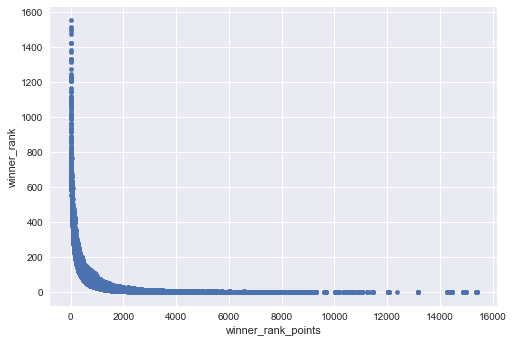

In [63]:
#et stk. plot
plt.style.use('seaborn')
Tennis_mod.plot(x='winner_rank_points', y='winner_rank', kind='scatter')
plt.show()


In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

#sti til mappe der skal arbejdes i 
os.chdir("/Users/Christofferku/Desktop/atp-matches-dataset/")

#hvis filen vi danner i forvejen findes slettes den så der kan køres en ny
if os.path.exists("Tennis_mod.csv"):
    os.remove("Tennis_mod.csv")
else:
    print('File does not exists')

#alle filer med format csv medtages og samles i tennis_total
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
Tennis_total = pd.concat([pd.read_csv(f) for f in all_filenames ])

#Vælger hvilke kolonner i tennis_total vi vil have med og danner det endelige dataset Tennis_mod
keep_col = ['tourney_id','tourney_name','surface','draw_size','winner_ht', 'winner_age', 'winner_rank', 'winner_rank_points', 'winner_ioc'] 
Tennis_mod=Tennis_total[keep_col]

#fjerner rækker med blanke celler
Tennis_mod = Tennis_mod[Tennis_mod['tourney_id'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['tourney_name'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['surface'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['draw_size'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_ht'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_age'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_rank'].notnull()]
Tennis_mod = Tennis_mod[Tennis_mod['winner_rank_points'].notnull()]

#Laver tennis_mod til csv som gemmes i samme mappe med stien
Tennis_mod.to_csv( "Tennis_mod.csv", index=False, encoding='utf-8-sig')

#et stk. printet samlet tabel
print(Tennis_mod)

#et stk. deskriptiv analyse
DataDescribe=Tennis_mod.describe()
print(DataDescribe)

#et stk. OLS
results = smf.ols('winner_rank ~ winner_age + winner_ht', data=Tennis_mod).fit()
print(results.summary())

#et stk. plot
plt.style.use('seaborn')
Tennis_mod.plot(x='winner_rank_points', y='winner_rank', kind='scatter')
plt.show()


#bumbum.
